### Neurophysiology and Biophysics - Practical course WS 2024/25
__Cornelia Kopp-Scheinpflug & Kay Thurley__

# Miniproject: Gap junctions and network synchorization

In this notebook we simulate a small network of electrically coupled Drosophila motoneurons. The network shows different regimes of synchrony depending on the coupling strength of the GAP junctions, which is supposed to underly the insect's flight. The model was used in Hürkey et al. (2023) and adapted by Kay Thurley (2024).


_Requirements:_ You will need Python 3 and the packages Numpy, Matplotlib and BRIAN2.


We start by importing the relevant packages.

In [2]:
import numpy as np
from brian2 import *
import sys, os
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
import json

from utils.brianutils import units
from utils.random_initial_conditions import *
from utils.sim import *
from utils.convert_ggap_ccs import *
from utils.spiketime_analysis_helper import *
from utils.convert_ggap_ccs import *

saving/loading sims from:  sim_results/


Then we define load some parameters and define the neuron.

In [5]:
md_SNL = json.load(open("cfg/Berger_SNL.json"))
md_SNIC = json.load(open("cfg/Berger_SNIC.json"))
ggap_hom = np.load('cfg/ggap_hom.npy')*nS
ggap_het = np.load('cfg/ggap_het.npy')*nS

In [6]:
### Splayness vs coupling coefficient
# cc_array = [0.001, 0.1, 0.2, 0.3]
    # g_gap = .15*nS
dur = 3*second
# solver = 'heun'#'rk4'
dt = 100*us
N = 5
cc_array = np.arange(0.01, 0.31, 0.02)
num_runs = 2
spm_array_all = []
# noise = 1e-9
for i in range(num_runs):
    spm_array = []
    for cc in cc_array:
        g_gap_now = cc2ggap(cc)
        g_gap = g_gap_now
        fname='SNL_weakcoupling_nonoise'
        noise_stdev = 1e-9
        φs_chosen = np.array([0.9, 0.6, 0.5, 0.7, 0.8])
        initial_values = pick_initial_phase_SNL(φs_chosen)
        if i == 1:
            solver = 'rk4'
            noise = None
        else:
            solver = 'heun'
            noise = 1e-9
        StM1, SpM1 = run_sim(N, md_SNL, g_gap, None, initial_values=initial_values,
                            dur=dur, σnoise=noise, solver=solver, dt=dt) 
        spm_array.append(get_splayness(SpM1, 1, 2, 100e-6)[1])
    spm_array_all.append(spm_array)
    # print(f'cc={cc}: {get_splayness(SpM1, 1, 4, 100e-6)[1]}')


Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 1s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 1s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 2s
Starting simulation at t=0. 

In [2]:
import pickle
import numpy as np
from brian2 import *
import sys, os
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
import json

from utils.brianutils import units
from utils.random_initial_conditions import *
from utils.sim import *
from utils.convert_ggap_ccs import *
from utils.spiketime_analysis_helper import *
from utils.convert_ggap_ccs import *
with open("sim_results/splayness_vs_coupling.pkl", "rb") as f:
    spm_array_all = pickle.load(f)
cc_array = np.arange(0.01, 0.31, 0.02)

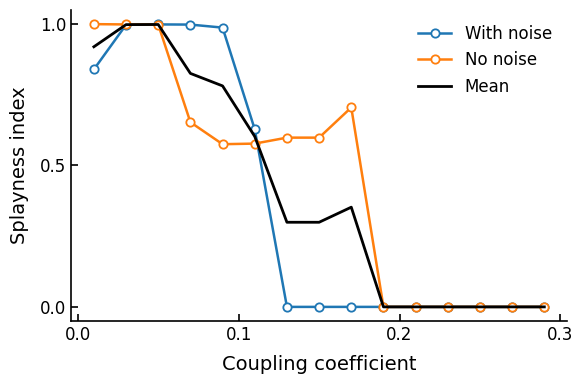

In [9]:
# --- Example data (remove this if you already have real ones) ---
# cc_array = np.linspace(0.01, 0.3, 10)
# spm_array_all = [np.random.rand(10)*0.5 + 0.5, np.random.rand(10)*0.5 + 0.3]

# --- Professional plot ---
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 15,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    # "font.family": "serif",
    # "font.serif": ["Times New Roman"],
})

fig, ax = plt.subplots(figsize=(6, 4))

colors = ['#1f77b4', '#ff7f0e']  # academic-safe blue and orange
labels = ['With noise', 'No noise']

for i, spm_array in enumerate(spm_array_all):
    ax.plot(
        cc_array, spm_array, 
        '-o', lw=1.8, ms=6, 
        label=labels[i],
        color=colors[i], 
        markerfacecolor='white', 
        markeredgewidth=1.3
    )

# Mean line
ax.plot(cc_array, np.mean(spm_array_all, axis=0),
        color='black', lw=2, label='Mean')

# --- Axes styling ---
ax.set_xlabel('Coupling coefficient', labelpad=8)
ax.set_ylabel('Splayness index', labelpad=8)
# ax.set_title('Splayness vs Coupling coefficient', pad=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0, 0.1, 0.2, 0.3])
ax.set_yticks([0, 0.5, 1.0])
ax.tick_params(direction='in', length=5, width=1.2)

# --- Legend ---
leg = ax.legend(frameon=False, loc='best')
for text in leg.get_texts():
    text.set_fontsize(12)

# --- Layout and export ---
plt.tight_layout()
plt.savefig("sim_results/splayness_vs_cc_withmean.svg", dpi=600, bbox_inches='tight')  # vector format
plt.show()


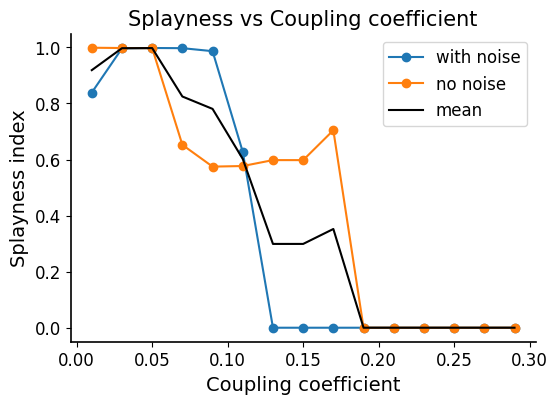

In [5]:
# plot cc vs splayness
fig, ax = plt.subplots(figsize=(6,4))
for i, spm_array in enumerate(spm_array_all):
    if i == 0:
        label = 'with noise'
        color = 'C0'
    else:
        label = f'no noise'
        color = 'C1'
    ax.plot(cc_array, spm_array, '-o', label=label, color=color)
ax.plot(cc_array, np.mean(spm_array_all, axis=0), color='black', label='mean')
ax.set_xlabel('Coupling coefficient')
ax.set_ylabel('Splayness index')
ax.set_title('Splayness vs Coupling coefficient')
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()



In [6]:
import pickle
with open('splayness_vs_coupling.pkl', 'wb') as f:
    pickle.dump(spm_array_all, f)

In [7]:
tstart 

NameError: name 'tstart' is not defined

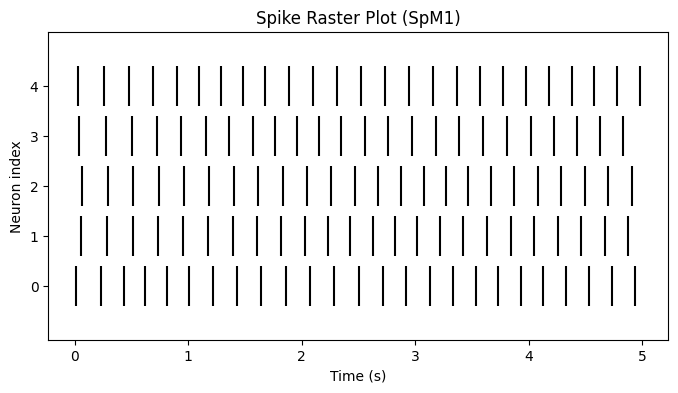

In [ ]:
# find interspike intervals for 4 neurons
N = 5
isi_list = []
for i in range(N):
    spike_times_i = SpM1.t_[SpM1.i == i] / ms  # convert to ms
    isis = np.diff(spike_times_i)  # interspike intervals
    isi_list.append(isis)

print("Interspike Intervals (ms) for each neuron:")
for i, isis in enumerate(isi_list):
    print(f"Neuron {i}: {isis}")
#!/usr/bin/env python3
import numpy as np
from brian2 import *

Interspike Intervals (ms) for each neuron:
Neuron 0: [215.2 202.5 190.7 189.6 198.2 206.4 211.6 214.3 214.9 214.7 214.3 213.1
 211.3 209.  206.4 203.5 200.5 198.2 197.3 198.3 200.2 202.5 204.4 205.5] Hz
Neuron 1: [231.7 226.6 222.4 220.7 218.8 216.8 214.8 212.2 208.1 203.4 198.8 195.4
 195.2 198.  201.8 204.9 206.9 208.  208.2 208.  207.2 206.  204.6] Hz
Neuron 2: [229.2 225.5 222.3 221.2 219.9 218.7 217.7 216.2 213.9 211.6 208.8 205.1
 201.1 197.8 196.6 197.7 200.3 203.1 205.2 206.6 207.3 207.4 206.9] Hz
Neuron 3: [232.  226.5 220.9 217.6 214.  209.3 203.5 197.2 192.9 193.8 198.6 203.4
 206.9 208.9 209.9 210.2 209.8 208.9 207.5 205.7 203.8 201.8 200.2] Hz
Neuron 4: [228.  221.6 213.5 205.2 196.8 191.5 193.5 200.1 206.1 209.9 212.  212.6
 212.1 211.4 210.4 209.  207.4 205.1 202.7 200.5 198.9 198.8 199.7 201.3] Hz
